# Text classification using TfidVectorization and Multinomial Gaussian Naive Bayes
Using `imdb_labelled.text` dataset

## Import and inspect data

In [1]:
import numpy
import pandas

In [2]:
data = pandas.read_csv("/users/danielcorcoran/desktop/github_repos/\
python_nb_sklearn_gaussian_naive_bayes/sentiment labelled sentences/imdb_labelled.txt",
                      sep = "\t",
                      header = None)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
0    748 non-null object
1    748 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [4]:
data.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [5]:
data.columns = ["comment_text", "sentiment_score"]

In [6]:
data.head()

,comment_text,sentiment_score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


## Build Model

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Create feature matrix and target vector

In [8]:
X = data["comment_text"]
y = data["sentiment_score"]

In [9]:
vectorizer = TfidfVectorizer()

### Transform feature matrix into sparse matrix using TFIDF Vectorizer

In [10]:
X_transformed = vectorizer.fit_transform(X)

In [11]:
X_transformed

<748x3047 sparse matrix of type '<class 'numpy.float64'>'
	with 11363 stored elements in Compressed Sparse Row format>

### Instantiate multinomial naive bayes model

In [12]:
model = MultinomialNB()

### Split feature matrix and target vector into training and testing components

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_transformed, y,
                                                test_size = 0.20,
                                                random_state = 0)

### Fit model to training data

In [14]:
model.fit(Xtrain, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Make prediction with model using Xtest data

In [15]:
y_prediction = model.predict(Xtest)

### Calculate and print accuracy of model

In [16]:
accuracy = accuracy_score(y_prediction, ytest)

In [17]:
accuracy

0.7533333333333333

## Cross Validate Model

### Perform 10 fold cross validation on model

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
scoring = "accuracy"
kfold = 10
results = cross_val_score(model, Xtrain, ytrain, cv= kfold, scoring = scoring)
print(results)

[0.78333333 0.75       0.76666667 0.83333333 0.76666667 0.73333333
 0.71666667 0.76666667 0.84745763 0.86440678]


In [20]:
import seaborn
import matplotlib.pyplot as plt
seaborn.set_style = "whitegrid"
seaborn.set(rc = {"figure.figsize":(14,8)},
           font_scale = 2)

### Generate confusion matrix

Text(0.5,1,'Confusion Matrix\n Predicted vs True counts')

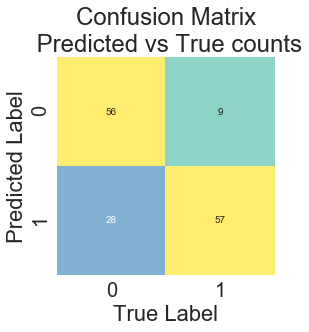

In [21]:
from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(ytest, y_prediction)

seaborn.heatmap(confusion_matrix.T, 
               square  = True,
               annot = True,
               fmt = "d",
               cbar = False,
               cmap = "Set3")

plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix\n Predicted vs True counts")